In [1]:

""" Dataset from: https://www.kaggle.com/rakannimer/air-passengers
International Airline Passengers prediction problem.
This is a problem where, given a year and a month, the task is to predict 
the number of international airline passengers in units of 1,000. 
The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.
"""

#importing the dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')
import seaborn as sns




In [2]:
#Load the dataset
df = pd.read_csv('FlightCSV/AirPassengers.csv')
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [3]:
#converitng month to datetime format
df['Month'] = pd.to_datetime(df['Month'])
print(type(df['Month']))
df


<class 'pandas.core.series.Series'>


,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [4]:
df = df.rename(columns={'#Passengers': 'Passengers'})

In [5]:
## changing index to month
df.set_index('Month', inplace=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


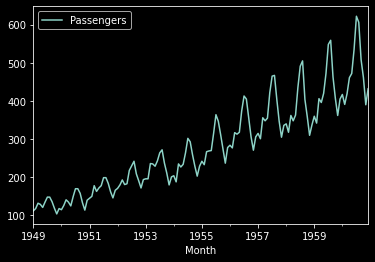

In [6]:
df.plot()
plt.legend()

## Is the data stationary
###  ` let's do dicky fuller test`

In [7]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag__,nobs__,critical__values__,icnbest__ = adfuller(df)
print("pvalue = ",pvalue,"if above 0.05,data is not stationary")

pvalue =  0.9918802434376411 if above 0.05,data is not stationary


#### SInce our data is not stationary we need to use SARIMA and not just ARIMA

In [8]:
# Extracting year from Month column and making new column as year
df['year'] = [d.year for d in df.index]
df

,Passengers,year
Month,,
1949-01-01,112,1949
1949-02-01,118,1949
1949-03-01,132,1949
1949-04-01,129,1949
1949-05-01,121,1949
...,...,...
1960-08-01,606,1960
1960-09-01,508,1960
1960-10-01,461,1960


In [9]:
#creating new column called month and returning month 
#Note we can use different alphabets like a,b,c,d,e,f.. in "d.strftime('%b') "
df['month'] = [d.strftime('%b') for d in df.index]
df

,Passengers,year,month
Month,,,
1949-01-01,112,1949,Jan
1949-02-01,118,1949,Feb
1949-03-01,132,1949,Mar
1949-04-01,129,1949,Apr
1949-05-01,121,1949,May
...,...,...,...
1960-08-01,606,1960,Aug
1960-09-01,508,1960,Sep
1960-10-01,461,1960,Oct


In [10]:
#printing unique year
years = df['year'].unique()
years

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960], dtype=int64)

## plot yearly and monthly value using boxplot

<AxesSubplot:xlabel='year', ylabel='Passengers'>

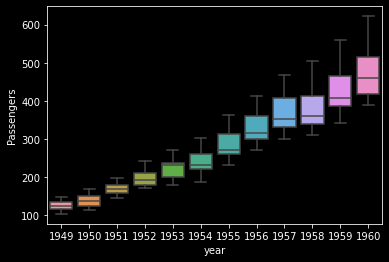

In [11]:
sns.boxplot(x='year',y='Passengers',data=df)


<AxesSubplot:xlabel='month', ylabel='Passengers'>

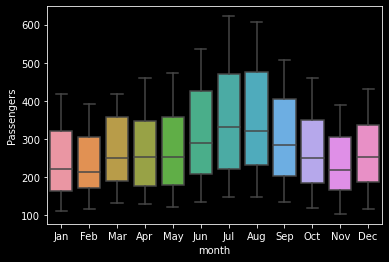

In [12]:

sns.boxplot(x='month',y='Passengers',data=df)



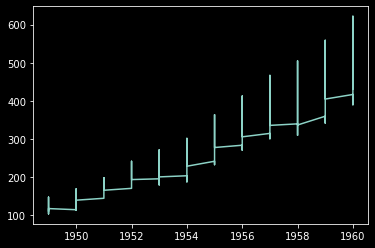

In [13]:
plt.plot(df['year'],df['Passengers'])

<AxesSubplot:xlabel='Month'>

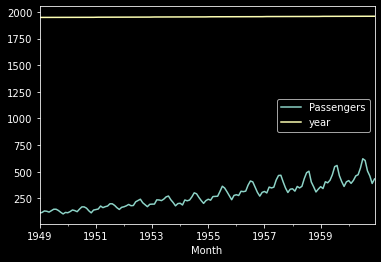

In [14]:
df.plot()


In [15]:
#Extract the plot trend seasonal and residual
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposed = seasonal_decompose(df['Passengers'],  
                            model ='additive')

In [16]:
#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error

In [22]:
trend = decomposed.trend
print("trend is",trend)
seasonal = decomposed.seasonal
print("decomposed is",seasonal)
residual = decomposed.trend
print("residual is :",residual)

trend is Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64
decomposed is Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64
residual is : Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64


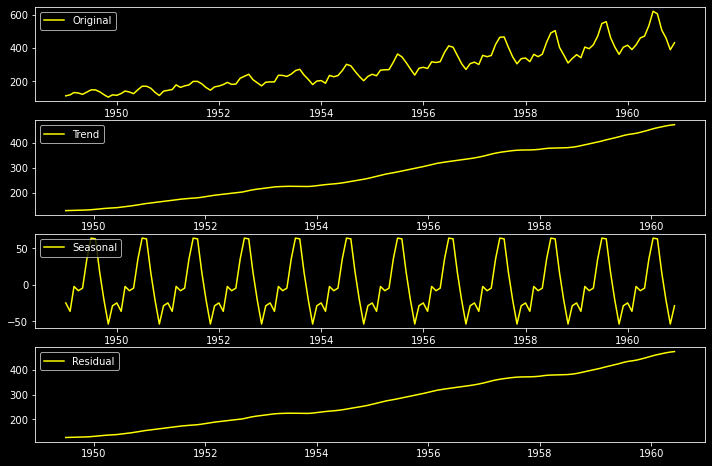

In [18]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Passengers'], label='Original', color='yellow')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='yellow')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='yellow')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.show()


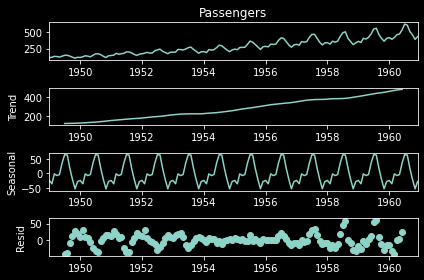

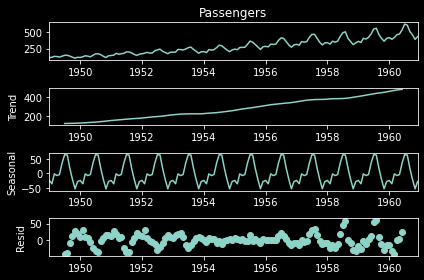

In [26]:
decomposed.plot()

# AUTOCORRELATION
 - Autocorrelation is simply the correlation of a series with its own lags.
- Plot lag on x axis and correlation on y axis
- Any correlation above confidence lnes are statistically significant.

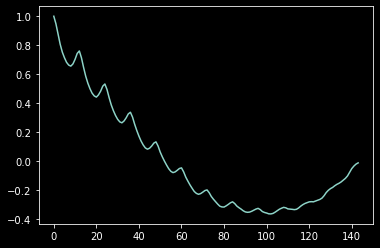

In [36]:
from statsmodels.tsa.stattools import acf

acf_144 = acf(df.Passengers,nlags=144,fft=False) #144 lags,FFt = fast fourier transform
plt.plot(acf_144)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

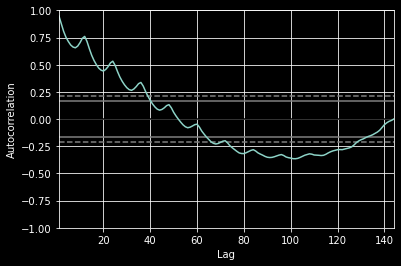

In [28]:
#Obtain the same but with single line and more info...
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Passengers) 
#Horizontal bands indicate 95% and 99% (dashed) confidence bands

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

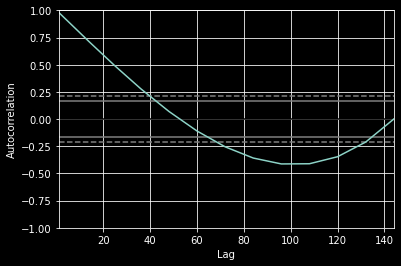

In [31]:
#Obtain the same but with single line and more info...
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.year) 
#Horizontal bands indicate 95% and 99% (dashed) confidence bands

In [33]:
!git add Flight_passengers.ipynb FlightCSV
!git commit -m "23:37/09-05-2021"
!git push origin main

The file will have its original line endings in your working directory


[main 897e4c5] 23:37/09-05-2021
 2 files changed, 1264 insertions(+)
 create mode 100644 FLIGHT_ARIMA/FlightCSV/AirPassengers.csv
 create mode 100644 FLIGHT_ARIMA/Flight_passengers.ipynb


To https://github.com/sumit-mandal/Pandas_For_StockMarket
   e7c914a..897e4c5  main -> main
